Results
---

31.03.2022  
* Dataset: "complete" (50 features):  
    * 23 items of FFMQ  
    * 20 items of UPPS-P  
    * 5 items of DMQ-coping  
    * 1 item for weekly working hours  
    * 1 item for sex 
    
* Tested regressors:
    * ElasticNet (scikit-learn)  
    * RandomForestRegressor (scikit-learn)  
    * ExtraTreesRegressor (scikit-learn)  
    * GrdientBoostingRegressor (scikit-learn)  
    * LGBMRegressor (lightgbm)  

## model scores

In [1]:
import pandas as pd


results_path = "./results/2022-03-31_10-06-05/"
results = pd.read_csv(results_path + "report.csv", sep=";", encoding="latin1",index_col=["Type","Split"]).sort_index()
results_grp = results.groupby("Type").mean()[["Train score (R²)","Test score (R²)"]].sort_values("Test score (R²)",ascending=False)

hline =  "\n------------------------------------------\n"
hdline = "\n==========================================\n"

print("(train R², test R²)")

for reg in results.index.levels[0]:
    print(hdline,"# "+reg + "  => ",format(results_grp.loc[reg][0],".3f")+", "+format(results_grp.loc[reg][1],".3f"),"(mean)",hdline)
    for split in results.index.levels[1]:
        print(hline,"## Split",str(split) + "  => ",format(results.loc[(reg,split)][1],".3f")+", "+format(results.loc[(reg,split)][2],".3f"),hline)
        print(results.loc[(reg,split),"Model"].replace("(","").replace(")","").replace(reg,"").replace(" ","").replace(",","\n").replace("\n\n","\n"))

(train R², test R²)

 # ElasticNet  =>  0.403, 0.333 (mean) 


------------------------------------------
 ## Split 1  =>  0.405, 0.360 
------------------------------------------

alpha=0.18732844811285773
l1_ratio=1.0

------------------------------------------
 ## Split 2  =>  0.356, 0.333 
------------------------------------------

alpha=0.4591980530028401
l1_ratio=0.44441089963078834

------------------------------------------
 ## Split 3  =>  0.399, 0.329 
------------------------------------------

alpha=0.21312877152099585
l1_ratio=1.0

------------------------------------------
 ## Split 4  =>  0.417, 0.388 
------------------------------------------

alpha=0.1414427663836193
l1_ratio=1.0

------------------------------------------
 ## Split 5  =>  0.438, 0.252 
------------------------------------------

alpha=0.18366059430221943
l1_ratio=1.0

 # ExtraTreesRegressor  =>  0.710, 0.311 (mean) 


------------------------------------------
 ## Split 1  =>  0.515, 0.310 
--------

## feature importance

In [2]:
import os
import json
import numpy as np
from get_data import get_mindfulness as get_data

json_files = [file for file in os.listdir(results_path) if file.lower()[-5:]==".json"]
X,_ = get_data("complete")
features = list(X.columns)
fi_types = ["m_imp","s_imp"]

# create empty dictionary tree
feature_importance = dict()
for reg in results.index.levels[0]:
    feature_importance[reg] = dict()
    for split in results.index.levels[1]:
        feature_importance[reg][split] = dict()
        for x_imp in fi_types:
            feature_importance[reg][split][x_imp] = dict()
            
# fill dictionary
for json_f in json_files:
    with open(results_path + json_f, "r") as fo:
        feat_data = np.array(json.load(fo)).T
    reg = json_f[:json_f.find("_")]
    split = int(json_f[1 + json_f.find("_"):json_f.find("_",1 + json_f.find("_"))])
    x_imp = json_f[-10:-5]
    feat_dict = dict(list(zip(features,feat_data)))
    feature_importance[reg][split][x_imp] = feat_dict

### Example: Model importance for ElasticNet Split 1

In [107]:
split = 1
reg = "ElasticNet"

ex_m_imp = pd.DataFrame(
    feature_importance[reg][split]["m_imp"]\
    .items(),columns=["feature","value"])\
    .sort_values("value",ascending=False)\
    .set_index("feature")

ex_m_imp

,value
feature,
geschlecht_kod_male,0.968548
dmq_cope_2,0.873387
upps_ur_5,0.733794
dmq_cope_4,0.640215
dmq_cope_1,0.532230
upps_ur_2,0.456958
ffmq_nj4,0.343999
dmq_cope_3,0.271753
upps_ss_3,0.185976


### Example: SHAP importance for ElasticNet Split 1

Each feature has a 1-dimensional array with 99 values, here shown as a histogram

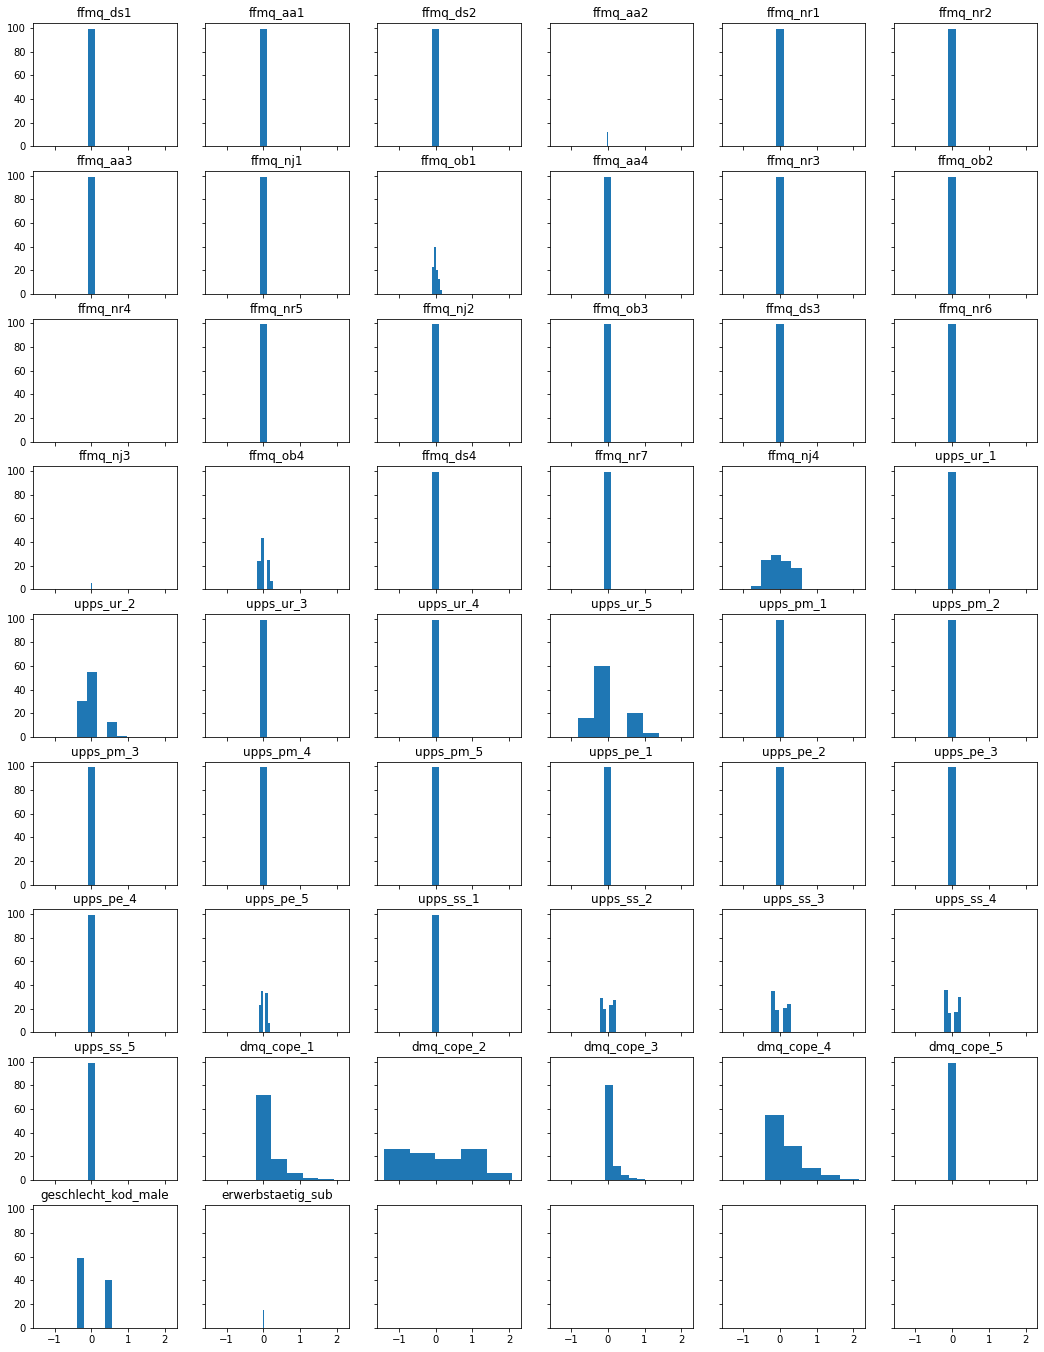

In [80]:
import matplotlib.pyplot as plt

split = 1
reg = "ElasticNet"

# plot
nrows = 9
ncols = 6

plt.subplots(nrows,ncols,figsize=(18,24),sharex=True,sharey=True)

for i,feat_mat in enumerate(feature_importance[reg][split]["s_imp"]):

    plt.subplot(nrows,ncols,i + 1)
    plt.hist(feature_importance[reg][split]["s_imp"][feat_mat], bins=5)
    plt.title(feat_mat)